In [25]:
## Libraries ##
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import pandas as pd
import numpy as np
import re 
import nltk 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.patches as mpatches

In [28]:
## Bhavya ##
df_train = pd.read_csv("train.txt", delimiter=';', header=None, names=['sentence','label'])
df_test = pd.read_csv("test.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("val.txt", delimiter=';', header=None, names=['sentence','label'])
df_test

,sentence,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [29]:
frames = [df_train, df_val]
df = pd.concat(frames)
df = df.reset_index()
df = df.drop(columns = "index")
df

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


In [30]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df)

,Total,Percent
sentence,0,0.0
label,0,0.0


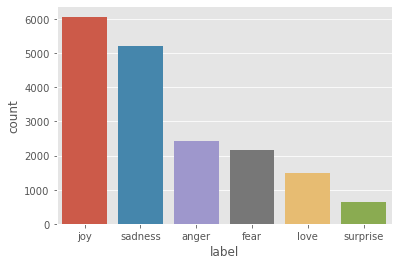

In [33]:

import seaborn as sns
sns.countplot(x ='label', data = df,order = df["label"].value_counts().index)
# Show the plot
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['label_enc'] = labelencoder.fit_transform(df['label'])
df_test['label_enc'] = labelencoder.transform(df_test['label'])

In [7]:
map = df[['label','label_enc']].drop_duplicates(keep='first')
map

,label,label_enc
0,sadness,4
2,anger,0
3,love,3
6,surprise,5
7,fear,1
8,joy,2


In [8]:
def relabel(a) :
    if a == 4 :
        o = "sadness"
    elif a == 0 :
        o = "anger"
    elif a == 3 :
        o = "love"
    elif a == 5 :
        o = "surprise"
    elif a == 1 :
        o = "fear"
    else :
        o = "joy"
    return o

In [9]:
df_test[['label','label_enc']].drop_duplicates(keep='first')

,label,label_enc
0,sadness,4
3,joy,2
5,fear,1
6,anger,0
14,love,3
65,surprise,5


In [10]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english')

# We transform each text into a vector
features_train = tfidf.fit_transform(df.sentence).toarray()
features_test = tfidf.transform(df_test.sentence).toarray()

features_train_name = tfidf.get_feature_names()

labels = df.label_enc

print("Feature train shape: "+str(features_train.shape[1]))

Jumlah Feature Setelah di Ekstrak : 3398


/common/home/mr1609/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
feature_train_df = pd.DataFrame(data=features_train,    # values,    # 1st column as index
                                columns=features_train_name)  # 1st row as the column names
feature_train_df

,abandoned,abilities,ability,abit,able,absolute,absolutely,abuse,abused,accept,...,youd,youll,young,younger,youre,youth,youtube,youve,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
feature_train_df

,abandoned,abilities,ability,abit,able,absolute,absolutely,abuse,abused,accept,...,youd,youll,young,younger,youre,youth,youtube,youve,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# models = [
#     RandomForestClassifier,
#     LinearSVC(),
#     MultinomialNB(),XGBClassifier()
# ]

models = [LinearSVC()]

# 5 Cross-validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features_train, labels, scoring='f1_macro', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_macro'])

/common/home/mr1609/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/common/home/mr1609/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/common/home/mr1609/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [14]:
mean_f1 = cv_df.groupby('model_name').f1_macro.mean()
std_f1 = cv_df.groupby('model_name').f1_macro.std()

f1 = pd.concat([mean_f1, std_f1], axis= 1, 
          ignore_index=True)
f1.columns = ['Mean F1_Macro', 'Standard deviation']
f1

,Mean F1_Macro,Standard deviation
model_name,,
LinearSVC,0.856706,0.008168


In [15]:
model = LinearSVC()
model.fit(features_train, labels)
y_pred = model.predict(features_test)

In [16]:
pred_cat = []
for i in y_pred:
  cat = relabel(i)
  pred_cat.append(cat)
pred_cat = np.array(pred_cat)

In [35]:
print(classification_report(df_test.label, pred_cat))

              precision    recall  f1-score   support

       anger       0.87      0.88      0.88       275
        fear       0.88      0.86      0.87       224
         joy       0.90      0.92      0.91       695
        love       0.75      0.75      0.75       159
     sadness       0.93      0.92      0.92       581
    surprise       0.74      0.68      0.71        66

    accuracy                           0.89      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.89      0.89      0.89      2000



In [36]:
def predict_emotion(text):
    x = tfidf.transform([text]).toarray()
    pred = relabel(model.predict(x))
    return pred

In [37]:
text = 'NotLikeThis NotLikeThis NotLikeThis'
predict_emotion(text)

'joy'

In [52]:
import socket
import concurrent.futures
import logging
import os
import re
import requests
import twitch
#from twitch import TwitchHelix
from itertools import islice
#f#rom messageanalysis import analyzeMessage
#import gensim
# Variables retrieved from env.sh
server = 'irc.chat.twitch.tv'
port = 6667
nickname = 'coldzxxx'
token = "oauth:s8m4mxvane29xkkk1pzuhmaigzsptf"
client = twitch.TwitchHelix(client_id = 'dlexwiqwkipca6z2tsvu9mqmb5bh7o',client_secret = '76q6qbn9u1rpnn734hjj4a3fso64gp', scopes=[twitch.constants.OAUTH_SCOPE_ANALYTICS_READ_EXTENSIONS])
client.get_oauth()
channel = '#pokimane'
numberOfStreams = 5
messagesPerStream = 100
sock = socket.socket()
sock.connect((server, port))
sock.send("PASS {}\n".format(token).encode('utf-8'))
sock.send("NICK {}\n".format(nickname).encode('utf-8'))
sock.send("JOIN {}\n".format(channel).encode('utf-8'))
resp = sock.recv(2048).decode('utf-8')
print(resp)
# games_iterator = client.get_top_games(page_size=3)
# print(games_iterator)
# streams_iterator = client.get_streams()
# print(streams_iterator)
def mapGamesToIds():
    gamesToIds = {}
    games_iterator = client.get_top_games(page_size=3)
    for game in islice(games_iterator, 0, 24):
        gamesToIds[game['name']] = game['id']
    print(gamesToIds)
    return gamesToIds
mapGamesToIds()
# Gets top 5 streams that are English and from (optional) specified game
def filterStreams(gameId):
    channels = []
    streams_iterator = client.get_streams()
    streamCount = 0

    for stream in islice(streams_iterator, 0, None):
        if stream['language'] != 'en' or (gameId is not None and gameId != stream['game_id']):
            continue
        channels.append('#' + stream['user_name'].lower())
        streamCount += 1
        if(streamCount == numberOfStreams):
            break

    print(channels)
    return channels
x = filterStreams('516575')
# Gets 50 live messages from channel
# def getLiveMessages(channel):
#     sock = socket.socket()
#     sock.connect((server, port))
#     sock.send("PASS {}\n".format(token).encode('utf-8'))
#     sock.send("NICK {}\n".format(nickname).encode('utf-8'))
#     sock.send("JOIN {}\n".format(channel).encode('utf-8'))
#     messages = []

#     for x in range(messagesPerStream):
#         resp = sock.recv(2048).decode('utf-8')
#         message = re.search(':(.*)', resp[1:])
#         if not message is None:
#             msg = message.group(0)[1:-1]
#             #print("Message:", msg, "| Channel:", channel)
#             messages.append(msg)

#     return messages
# for i in x:
#     getLiveMessages(i)
 

:tmi.twitch.tv 001 coldzxxx :Welcome, GLHF!
:tmi.twitch.tv 002 coldzxxx :Your host is tmi.twitch.tv
:tmi.twitch.tv 003 coldzxxx :This server is rather new
:tmi.twitch.tv 004 coldzxxx :-
:tmi.twitch.tv 375 coldzxxx :-
:tmi.twitch.tv 372 coldzxxx :You are in a maze of twisty passages, all alike.
:tmi.twitch.tv 376 coldzxxx :>

{'VALORANT': '516575', 'Just Chatting': '509658', 'Grand Theft Auto V': '32982', 'League of Legends': '21779', 'Escape from Tarkov': '491931', 'Fortnite': '33214', 'Minecraft': '27471', 'Call of Duty: Warzone': '512710', 'Mario Party Superstars': '1068239917', 'FIFA 22': '1869092879', 'Dota 2': '29595', 'World of Warcraft': '18122', 'Sports': '518203', 'Counter-Strike: Global Offensive': '32399', 'Animal Crossing: New Horizons': '509538', 'Teamfight Tactics': '513143', 'Apex Legends': '511224', 'Special Events': '509663', 'Super Smash Bros. Melee': '16282', 'Halo Infinite': '506416', 'Dead by Daylight': '491487', 'Slots': '498566', 'Propnight': '1342987707', 'Diabl

KeyboardInterrupt: 

In [59]:
numberOfStreams = 5
messagesPerStream = 5
def getLiveMessages(channel):
    sock = socket.socket()
    sock.connect((server, port))
    sock.send("PASS {}\n".format(token).encode('utf-8'))
    sock.send("NICK {}\n".format(nickname).encode('utf-8'))
    sock.send("JOIN {}\n".format(channel).encode('utf-8'))
    messages = []

    for x in range(messagesPerStream):
        resp = sock.recv(2048).decode('utf-8')
        message = re.search(':(.*)', resp[1:])
        if not message is None:
            msg = message.group(0)[1:-1]
            print("Message:", msg, "| Channel:", channel)
            messages.append(msg)
    #print(messages)
    return messages
dictt = {}
for i in x:
    listofComments = getLiveMessages(i)
    for n, m in enumerate(listofComments):
        listofComments[n] = predict_emotion(m)
        print(listofComments)
        d = {x:listofComments.count(x) for x in listofComments}
        print(d)
        dictt[i] = d
print(dictt)

        # def most_frequent(listofComments):
        #     return max(set(listofComments), key = listofComments.count)

        # mosst = most_frequent(listofComments)
        # dictt[i] = mosst

user = input('What mood specifies your interest to watch streamers right now ?')
#user = input("What")
for k,v in dictt.items():
    for keys in v.items():
        if user == keys[0]:
            print(k)

Message: Welcome, GLHF! | Channel: #valorant
Message: coldzxxx.tmi.twitch.tv 353 coldzxxx = #valorant :coldzxxx | Channel: #valorant
Message: a | Channel: #valorant
Message: 7-5 | Channel: #valorant
Message: 9-3 curse averted | Channel: #valorant
['joy', 'coldzxxx.tmi.twitch.tv 353 coldzxxx = #valorant :coldzxxx', 'a', '7-5', '9-3 curse averted']
{'joy': 1, 'coldzxxx.tmi.twitch.tv 353 coldzxxx = #valorant :coldzxxx': 1, 'a': 1, '7-5': 1, '9-3 curse averted': 1}
['joy', 'joy', 'a', '7-5', '9-3 curse averted']
{'joy': 2, 'a': 1, '7-5': 1, '9-3 curse averted': 1}
['joy', 'joy', 'joy', '7-5', '9-3 curse averted']
{'joy': 3, '7-5': 1, '9-3 curse averted': 1}
['joy', 'joy', 'joy', 'joy', '9-3 curse averted']
{'joy': 4, '9-3 curse averted': 1}
['joy', 'joy', 'joy', 'joy', 'joy']
{'joy': 5}
Message: Welcome, GLHF! | Channel: #kyedae
Message: coldzxxx.tmi.twitch.tv 353 coldzxxx = #kyedae :coldzxxx | Channel: #kyedae
Message: 9-3 AVOIDED | Channel: #kyedae
Message: no 5Head emote tho sadCat | Ch

: 